In [8]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd

In [9]:
configs = [
    {
        'alg': 'genetic_alg',
        'lr': 1e-6,
        'clip': 5,
        'max_attempts': 100,
        'hidden_nodes': [10],
        'pop_size': 200,
        'mut_rate': 0.1,
        'max_patience': 5,
    },
    {
        'alg': 'genetic_alg',
        'lr': 1e-4,
        'clip': 5,
        'max_attempts': 100,
        'hidden_nodes': [10],
        'pop_size': 200,
        'mut_rate': 0.1,
        'max_patience': 5,
    },
    {
        'alg': 'genetic_alg',
        'lr': 1e-2,
        'clip': 5,
        'max_attempts': 100,
        'hidden_nodes': [10],
        'pop_size': 200,
        'mut_rate': 0.1,
        'max_patience': 5,
    },
    {
        'alg': 'genetic_alg',
        'lr': 1,
        'clip': 5,
        'max_attempts': 100,
        'hidden_nodes': [10],
        'pop_size': 200,
        'mut_rate': 0.1,
        'max_patience': 5,
    },
]

In [10]:
# configs = [
#     {
#         'alg': 'genetic_alg',
#         'lr': 1e-6,
#         'clip': 5,
#         'max_attempts': 100,
#         'hidden_nodes': [10],
#         'pop_size': 200,
#         'mut_rate': 0.1,
#         'max_patience': 5,
#     },
#     {
#         'alg': 'genetic_alg',
#         'lr': 1e-3,
#         'clip': 5,
#         'max_attempts': 100,
#         'hidden_nodes': [10],
#         'pop_size': 200,
#         'mut_rate': 0.1,
#         'max_patience': 5,
#     },
#     {
#         'alg': 'genetic_alg',
#         'lr': 1,
#         'clip': 5,
#         'max_attempts': 100,
#         'hidden_nodes': [10],
#         'pop_size': 200,
#         'mut_rate': 0.1,
#         'max_patience': 5,
#     },
# ]

In [11]:
COLORS = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

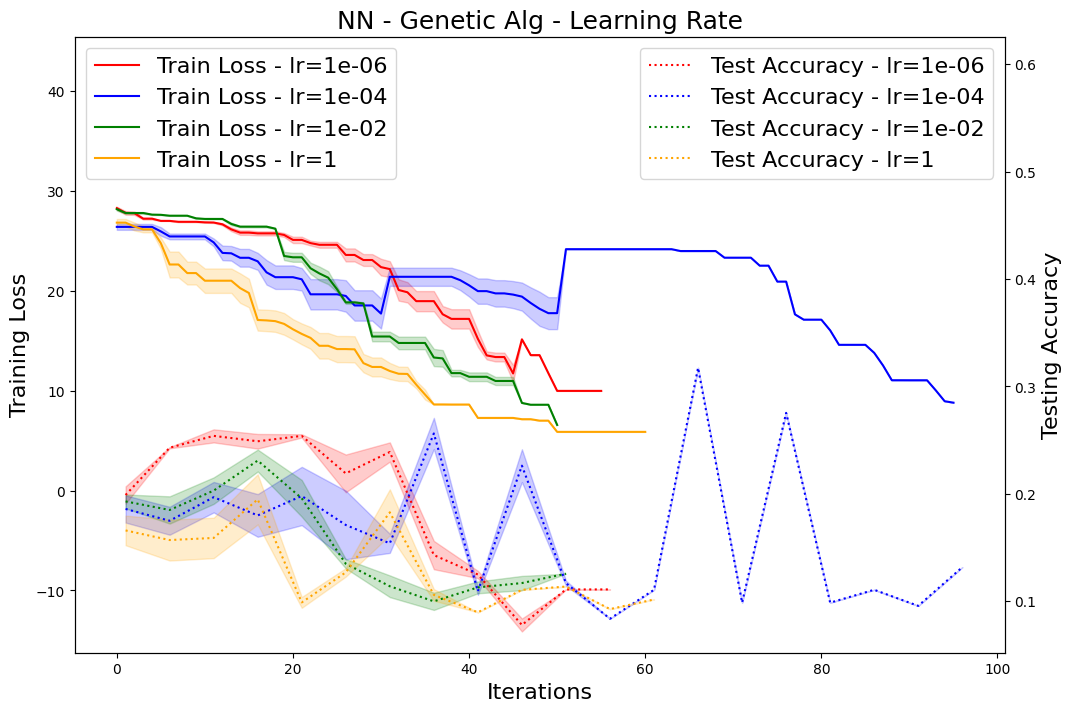

In [12]:
FONTSIZE = 18
# use two y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('NN - Genetic Alg - Learning Rate', fontsize=FONTSIZE)
ax2 = ax1.twinx()
ax1.set_xlabel('Iterations', fontsize=FONTSIZE-2)
ax1.set_ylabel('Training Loss', fontsize=FONTSIZE-2)
ax2.set_ylabel('Testing Accuracy', fontsize=FONTSIZE-2)

max_y1 = 0
min_y1 = np.inf
max_y2 = 0
min_y2 = np.inf

for config_i, config in enumerate(configs):
    path = "metrics/{alg}/{alg}_pop_size{pop_size}_mut_rate{mut_rate}_pat{max_patience}_lr{lr}_clip{clip}_max_attempts{max_attempts}_hidden_nodes{hidden_nodes}.pkl".format(**config)
    data = pickle.load(open(path, "rb"))

    mean_test_accuracies = []
    std_test_accuracies = []
    n = max([len(run['test_scores']) for run in data['runs']])
    for i in range(n):
        accuracies = [run['test_scores'][i] for run in data['runs'] if i < len(run['test_scores'])]
        mean_test_accuracies.append(np.mean(accuracies))
        std_test_accuracies.append(np.std(accuracies))
    mean_test_accuracies = np.array(mean_test_accuracies)
    std_test_accuracies = np.array(std_test_accuracies) / 4
    max_y2 = max(max_y2, np.max(mean_test_accuracies + std_test_accuracies))
    min_y2 = min(min_y2, np.min(mean_test_accuracies - std_test_accuracies))
    
    max_len = 0
    iterations = None
    # print(config['lr'])
    for run in data['runs']:
        # print(run['iterations'].max())
        if len(run['iterations']) > max_len:
            max_len = len(run['iterations'])
            iterations = run['iterations']
    iterations = np.array(iterations)
        
    mean_train_losss = []
    std_train_losss = []
    n = max([len(run['fitness_curve']) for run in data['runs']])
    for i in range(n):
        losses = [run['fitness_curve'][i][0] for run in data['runs'] if i < len(run['fitness_curve'])]
        mean_train_losss.append(np.mean(losses))
        std_train_losss.append(np.std(losses))
    mean_train_losss = np.array(mean_train_losss)
    std_train_losss = np.array(std_train_losss) / 4
    max_y1 = max(max_y1, np.max(mean_train_losss + std_train_losss))
    min_y1 = min(min_y1, np.min(mean_train_losss - std_train_losss))

    FILL_ALPHA = 0.2

    if config['lr'] >= 1:
        lr_str = f"{config['lr']:.0f}"
    else:
        lr_str = f"{config['lr']:.0e}"
        
    ax1.plot(mean_train_losss, label=f"Train Loss - lr={lr_str}",
             linestyle='-', color=COLORS[config_i])
    ax1.fill_between(range(len(mean_train_losss)), 
                     mean_train_losss - std_train_losss, 
                     mean_train_losss + std_train_losss, 
                     alpha=FILL_ALPHA, color=COLORS[config_i])

    ax2.plot(iterations, mean_test_accuracies, label=f"Test Accuracy - lr={lr_str}",
             linestyle='dotted', color=COLORS[config_i])
    ax2.fill_between(iterations, 
                     mean_test_accuracies - std_test_accuracies, 
                     mean_test_accuracies + std_test_accuracies, 
                     alpha=FILL_ALPHA, color=COLORS[config_i])

min_y1 += -20
max_y2 += 0.15

range_1 = max_y1 - min_y1
range_2 = max_y2 - min_y2
lower_margin = 0.05
upper_margin = 0.4
ax1.set_ylim(min_y1 - lower_margin * range_1, max_y1 + upper_margin * range_1)
ax2.set_ylim(min_y2 - lower_margin * range_2, max_y2 + upper_margin * range_2)

ax1.legend(loc='upper left', fontsize=FONTSIZE-2)
ax2.legend(loc='upper right', fontsize=FONTSIZE-2)
fig.savefig('nn_ga_lr.png')

In [13]:
config

{'alg': 'genetic_alg',
 'lr': 1,
 'clip': 5,
 'max_attempts': 100,
 'hidden_nodes': [10],
 'pop_size': 200,
 'mut_rate': 0.1,
 'max_patience': 5}

In [15]:
df_data = {'Algorithm': [], 'Learning Rate': [], 'Max Attempts': [], 'Population Size': [], 
           'Mutation Rate': [], 'Test Accuracy': [],
           'Runtime': [], 'Iterations': [], 'Max Iterations': []}

for config_i, config in enumerate(configs):
    path = "metrics/{alg}/{alg}_pop_size{pop_size}_mut_rate{mut_rate}_pat{max_patience}_lr{lr}_clip{clip}_max_attempts{max_attempts}_hidden_nodes{hidden_nodes}.pkl".format(**config)
    data = pickle.load(open(path, "rb"))

    mean_test_accuracies = []
    std_test_accuracies = []
    n = max([len(run['test_scores']) for run in data['runs']])
    for i in range(n):
        accuracies = [run['test_scores'][i] for run in data['runs'] if i < len(run['test_scores'])]
        mean_test_accuracies.append(np.mean(accuracies))
        std_test_accuracies.append(np.std(accuracies))
    mean_test_accuracies = np.array(mean_test_accuracies)
    std_test_accuracies = np.array(std_test_accuracies)
    
    max_len = 0
    iterations = None
    for run in data['runs']:
        if len(run['iterations']) > max_len:
            max_len = len(run['iterations'])
            iterations = run['iterations']
    iterations = np.array(iterations)
        
    mean_train_losss = []
    std_train_losss = []
    n = max([len(run['fitness_curve']) for run in data['runs']])
    for i in range(n):
        losses = [run['fitness_curve'][i][0] for run in data['runs'] if i < len(run['fitness_curve'])]
        mean_train_losss.append(np.mean(losses))
        std_train_losss.append(np.std(losses))
    mean_train_losss = np.array(mean_train_losss)
    std_train_losss = np.array(std_train_losss)

    index = np.argmax(mean_test_accuracies)
    test_acc = mean_test_accuracies[index]
    test_acc_std = std_test_accuracies[index]

    if 'runtime' not in data['runs'][0]:
        mean_runtime = np.nan
        std_runtime = np.nan
    else:
        mean_runtime = np.mean([run['runtime'] for run in data['runs']])
        std_runtime = np.std([run['runtime'] for run in data['runs']])

    mean_iterations = np.mean([np.max(run['iterations']) for run in data['runs']]) 
    max_iterations = np.max([np.max(run['iterations']) for run in data['runs']])

    df_data['Algorithm'].append(config['alg'])
    df_data['Learning Rate'].append(f"{config['lr']:0.0e}")
    df_data['Max Attempts'].append(config['max_attempts'])
    df_data['Population Size'].append(config['pop_size'])
    df_data['Mutation Rate'].append(f"{config['mut_rate']:0.2f}")
    df_data['Test Accuracy'].append(f"{test_acc:.2%}")
    df_data['Runtime'].append(f"{mean_runtime:.2f}")
    df_data['Iterations'].append(f"{mean_iterations:.0f}")
    df_data['Max Iterations'].append(f"{max_iterations:.0f}")

df = pd.DataFrame(df_data)
df.to_csv('metrics/nn_ga.csv', index=False)
df.style.hide(axis='index')

Algorithm,Learning Rate,Max Attempts,Population Size,Mutation Rate,Test Accuracy,Runtime,Iterations,Max Iterations
genetic_alg,1e-06,100,200,0.10,25.40%,260.89,48,56
genetic_alg,1e-04,100,200,0.10,31.74%,645.98,59,96
genetic_alg,1e-02,100,200,0.10,23.11%,927.64,48,51
genetic_alg,1e+00,100,200,0.10,19.49%,947.49,44,61
